In [1]:
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus = False)

In [2]:
dataset = pd.read_csv('data/LinearRegressionData.csv')
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [3]:
#독립변수, 종속변수
X = dataset.iloc[:, :-1].values  #X.shape: (20, 1) - 2차원 배열
y = dataset.iloc[:, -1].values  #y.shape:  (20, ) - 1차원 배열

In [4]:
#scikit-learn: 머신러닝 할때 많이 사용하는 패키지

In [5]:
reg = LinearRegression()  #모델생성
reg.fit(X, y)  #학습

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


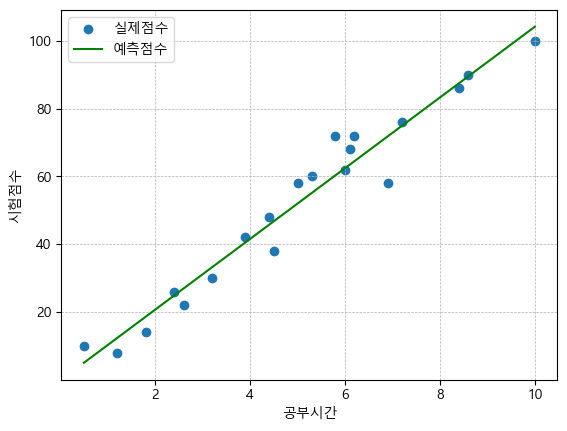

In [6]:
plt.scatter(X, y, label='실제점수')
plt.plot(X, reg.predict(X), label='예측점수', color='g')
# xticks = [int(x) for x in range(len(X))]
# plt.xticks(xticks)

plt.grid(ls='--', lw=0.5)
plt.legend()
plt.xlabel('공부시간')
plt.ylabel('시험점수')
plt.show()

In [7]:
y_pred = reg.predict(X)

In [8]:
X, y_pred, y  #예측, 실제

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
         26.93512734,  33.20134551,  40.51193337,  45.73378184,
         46.77815153,  52.        ,  55.13310908,  60.35495755,
         62.44369694,  63.48806663,  64.53243633,  71.84302419,
         74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100]))

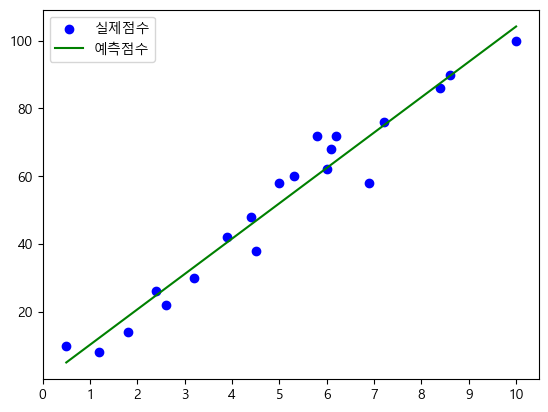

In [9]:
plt.scatter(X, y, color='blue', label='실제점수')
plt.plot(X, y_pred, color='g', label='예측점수')
plt.legend()

xticks = [x for x in range(11)]
plt.xticks(xticks)

plt.show()

In [10]:
#9/ 7/ 4시간 공부했을때 예측
pred = reg.predict([[9], [7], [4]])
pred

array([93.77478776, 72.88739388, 41.55630306])

In [11]:
#y = mx + b
m = reg.coef_
b = reg.intercept_
m, b

(array([10.44369694]), np.float64(-0.218484702867201))

In [12]:
y = m*9 + b  #reg.predict([[9]])
y

array([93.77478776])

In [13]:
#'선형회귀 모델' 생성 함수
def model_linear():
    import pandas as pd
    from sklearn.linear_model import LinearRegression

    dataset = pd.read_csv('data/LinearRegressionData.csv') #학습 데이터
    X = dataset.iloc[:, :-1].values  #독립변수
    y = dataset.iloc[:, -1].values  #종속변수

    reg = LinearRegression()
    reg.fit(X, y)  

    return reg

In [14]:
model = model_linear()

In [15]:
model.predict([[9]])

array([93.77478776])

In [16]:
def predict(hour):
    model = model_linear()
    pred = model.predict([[hour]])
    print(f'{hour}시간 공부했을때 예상점수: {pred[0]:.2f}점')

predict(9)

9시간 공부했을때 예상점수: 93.77점


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

X.shape, y.shape

((20, 1), (20,))

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  #train_size=0.8 -> 랜덤하게 테스트용 4개, 학습용 16개로 분리
                                                    random_state=0)  #랜덤x
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((16, 1), (16,), (4, 1), (4,))

In [20]:
X_train, X_test

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]),
 array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]))

In [21]:
reg = LinearRegression()
reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


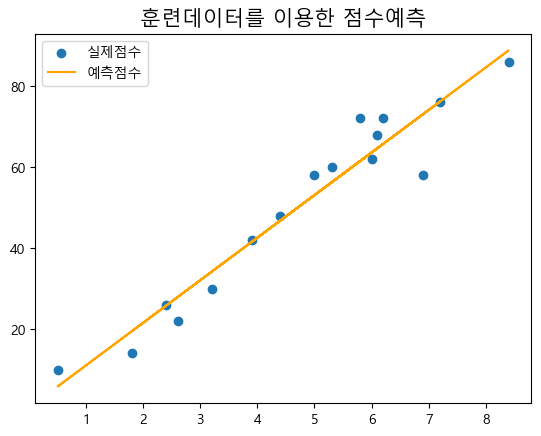

In [22]:
plt.scatter(X_train, y_train, label='실제점수')
plt.plot(X_train, reg.predict(X_train), label='예측점수', color='orange')

plt.legend()
plt.title('훈련데이터를 이용한 점수예측', size=15)

plt.show()

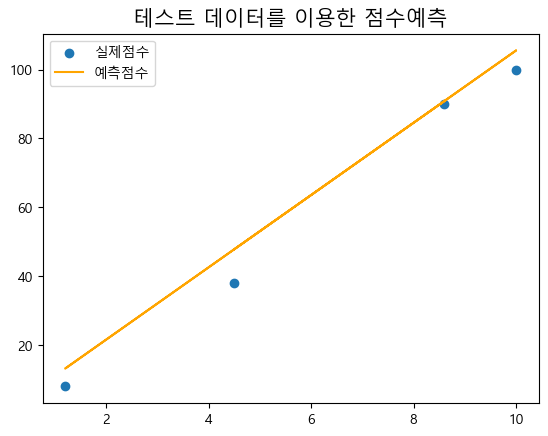

In [23]:
plt.scatter(X_test, y_test, label='실제점수')
plt.plot(X_test, reg.predict(X_test), label='예측점수', color='orange')

plt.legend()
plt.title('테스트 데이터를 이용한 점수예측', size=15)

plt.show()

In [24]:
reg = LinearRegression()
reg.fit(X, y)
reg.score(X, y) #모델을 잘 만들었는지 점수로 테스트

0.9531481530310588

In [25]:
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.9727616474310156

In [26]:
reg.fit(X_test, y_test)
reg.score(X_test, y_test)

0.9939502903988819

확률적 경사하강법

In [27]:
#확률적 경사하강법 모델링: 노이즈 제거를 위해
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  #다양한 학습을 위해서/ 과적합 방지

In [28]:
from sklearn.linear_model import SGDRegressor

sr = SGDRegressor()
sr.fit(X_train, y_train)

,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,None


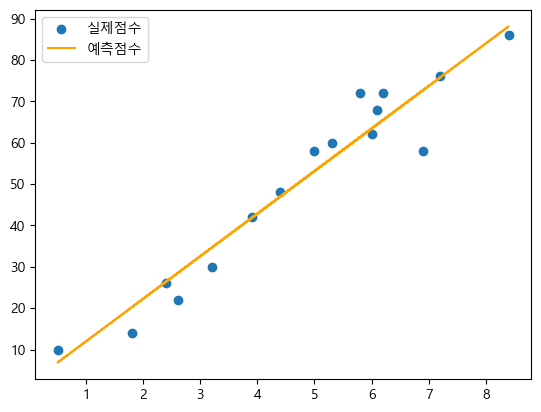

In [29]:
plt.scatter(X_train, y_train, label='실제점수')
plt.plot(X_train, sr.predict(X_train), label='예측점수', color='orange')

plt.legend()

plt.show()

In [30]:
#y = mx + b
m = sr.coef_
b = sr.intercept_
m, b

(array([10.28076879]), array([1.72717075]))

In [31]:
from sklearn.linear_model import SGDRegressor
sr = SGDRegressor(max_iter=100, eta0=1e-3, random_state=0, verbose=1)  #적절한 반복횟수, 폭 지정 필요/ 1e-3 = 0.001
sr.fit(X_train, y_train)  #84번 반복->loss:17
sr.score(X_test, y_test)

-- Epoch 1
Norm: 2.40, NNZs: 1, Bias: 0.442470, T: 16, Avg. loss: 1181.034371
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 3.84, NNZs: 1, Bias: 0.697455, T: 32, Avg. loss: 754.011321
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 4.89, NNZs: 1, Bias: 0.881472, T: 48, Avg. loss: 520.842928
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 5.70, NNZs: 1, Bias: 1.023556, T: 64, Avg. loss: 374.527388
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 6.34, NNZs: 1, Bias: 1.137258, T: 80, Avg. loss: 277.717040
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 6.88, NNZs: 1, Bias: 1.230635, T: 96, Avg. loss: 210.603548
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 7.32, NNZs: 1, Bias: 1.308149, T: 112, Avg. loss: 162.433366
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 7.69, NNZs: 1, Bias: 1.372847, T: 128, Avg. loss: 127.468199
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 8.01, NNZs: 1, Bias: 1.427757, T: 144, Avg. loss: 101.814505
Total training time: 0.

0.9719916063560563

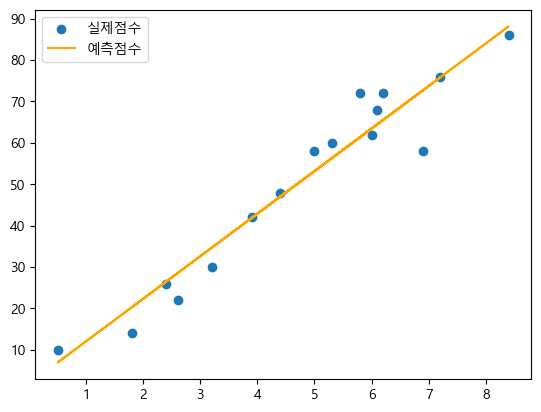

In [32]:
plt.scatter(X_train, y_train, label='실제점수')
plt.plot(X_train, sr.predict(X_train), label='예측점수', color='orange')

plt.legend()

plt.show()

In [33]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [34]:
iter=[100, 150, 200, 1000]
eta0 = 0.0001  #1e-4  /1e+4=10000
models = []

for i in iter:
    sr = SGDRegressor(max_iter=i, eta0=eta0, random_state=0)
    sr.fit(X_train, y_train)
    models.append(sr)

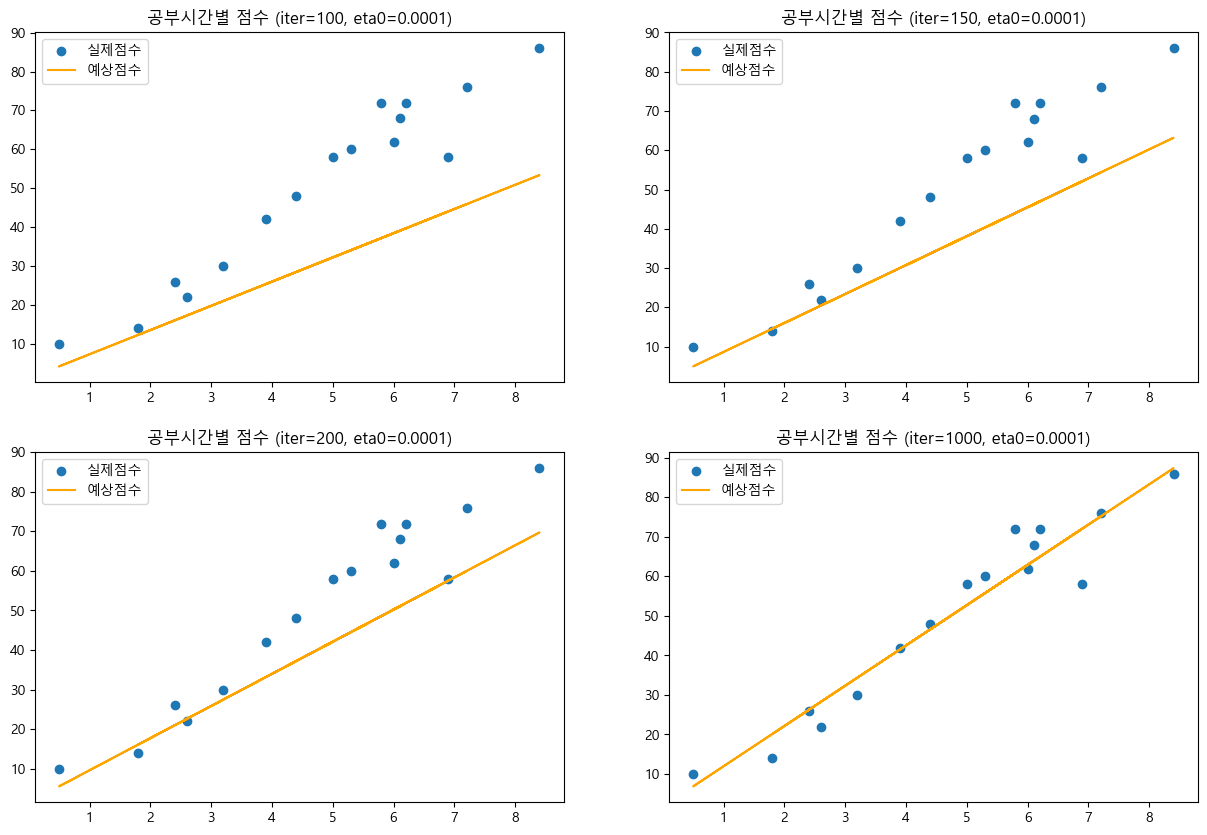

In [35]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs[0, 0].scatter(X_train, y_train, label='실제점수')
axs[0, 0].plot(X_train, models[0].predict(X_train), label='예상점수', color='orange')
axs[0, 0].legend()
axs[0, 0].set_title(f'공부시간별 점수 (iter={iter[0]}, eta0={eta0})')

axs[0, 1].scatter(X_train, y_train, label='실제점수')
axs[0, 1].plot(X_train, models[1].predict(X_train), label='예상점수', color='orange')
axs[0, 1].legend()
axs[0, 1].set_title(f'공부시간별 점수 (iter={iter[1]}, eta0={eta0})')

axs[1, 0].scatter(X_train, y_train, label='실제점수')
axs[1, 0].plot(X_train, models[2].predict(X_train), label='예상점수', color='orange')
axs[1, 0].legend()
axs[1, 0].set_title(f'공부시간별 점수 (iter={iter[2]}, eta0={eta0})')

axs[1, 1].scatter(X_train, y_train, label='실제점수')
axs[1, 1].plot(X_train, models[3].predict(X_train), label='예상점수', color='orange')
axs[1, 1].legend()
axs[1, 1].set_title(f'공부시간별 점수 (iter={iter[3]}, eta0={eta0})')

plt.show()

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

In [37]:
dataset = pd.read_csv('data/LinearRegressionData.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [38]:
reg = LinearRegression()
reg.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [39]:
sr = SGDRegressor()
sr.fit(X, y)

,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,None


In [40]:
reg.score(X, y), sr.score(X, y)  #0에 가까울수록 좋은 모델

(0.9531481530310588, 0.9520924987086267)

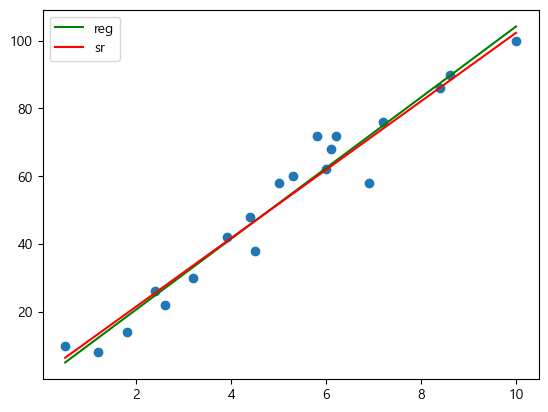

In [41]:
plt.scatter(X, y)
plt.plot(X, reg.predict(X), label='reg', c= 'g')
plt.plot(X, sr.predict(X), label='sr', c='r')

plt.legend()
plt.show()